In [1]:
from IPython.display import Image
from IPython.display import Latex
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

<h3><font color='blue'>=========================================</font></h3>
<h1>Neural Networks</h1>
<h3>Neural networks owe their name to the intent to mimic how neurons in the brains work</h3>
<h3>Multi layered networks are constructed - where each unit in the subsequent layers learns from each unit in the preceding layer</h3>
<h3>The first layer may have high dimensionality - the second can be a lower dimension layer - on which output from each unit in the preceding layer will impinge - and so on the learning will pass through to ensuing layers</h3>
<font size=4>
<h3>The dimensionality of each layer will be of size $S_{L+1}*(S_L+1)$ where L and L+1 are two consecutive layers</h3>
<h3>The final layer will have units equal to the number of classes we are trying to determine - we will see later that trying to recognize digits we will have ten classes ( 0 - 9 ) to decide from</h3>
<h5>We label these intermediate or "hidden" layer nodes $a_0^2⋯a_n^2$ and call them "activation units</h5>

<h5>$a_i^{(j)}$= activation of unit i in layer j</h5>
<h5>$\ominus^{(j)}$ = matrix of weights controlling function mapping from layer j to layer j+1</h5>

<h5>If we had one hidden layer, it would look visually something like:</h5><br>

$
\begin{bmatrix}
x_0 \newline
x_1 \newline
x_2 \newline
x_3
\end{bmatrix} \rightarrow
\begin{bmatrix}
a_1^{(2)} \newline
a_2^{(2)} \newline
a_3^{(2)} \newline
\end{bmatrix}
\rightarrow
h_\theta(x)$

<br>

<h3>The values for each of the activation nodes would be computed as follows:</h3><br>
$
\begin{align*}
a_1^{(2)} = g(\Theta_{10}^{(1)}x_0 + \Theta_{11}^{(1)}x_1 + \Theta_{12}^{(1)}x_2 + \Theta_{13}^{(1)}x_3) \newline
a_2^{(2)} = g(\Theta_{20}^{(1)}x_0 + \Theta_{21}^{(1)}x_1 + \Theta_{22}^{(1)}x_2 + \Theta_{23}^{(1)}x_3) \newline
a_3^{(2)} = g(\Theta_{30}^{(1)}x_0 + \Theta_{31}^{(1)}x_1 + \Theta_{32}^{(1)}x_2 + \Theta_{33}^{(1)}x_3) \newline
\,\,\,\,\,\,\,\,\,\,h_\Theta(x) = a_1^{(3)} = g(\Theta_{10}^{(2)}a_0^{(2)} + \Theta_{11}^{(2)}a_1^{(2)} + \Theta_{12}^{(2)}a_2^{(2)} + \Theta_{13}^{(2)}a_3^{(2)}) \newline
\end{align*}$
<h5>Each layer gets its own matrix $\ominus^{(j)}$ of parameters</h5>
<h4>The cost function for a neural network<br><br>We will now apply the logistic function across the layers and
minimize the cumulative cost across<br></h4>
$
J(\Theta) = - \frac{1}{m} \left[ \sum_{i=1}^m \sum_{k=1}^K y^{(i)}_k \log ((h_\Theta (x^{(i)}))_k) + (1 - y^{(i)}_k)\log (1 - (h_\Theta(x^{(i)}))_k)\right]$<br><br>
$+ \frac{\lambda}{2m}\sum_{l=1}^{L-1} \sum_{i=1}^{s_l} \sum_{j=1}^{s_{l+1}} ( \Theta_{j,i}^{(l)})^2
$
<h4>The backpropagation algorithm is used to minimize the cost function</h4><br>
<h4>In backpropagation we're going to compute for every node:</h4><br>
$δ^{(l)}_j$ = "error" of node j in layer l <br>
$a^{(l)}_j$ is activation node j in layer l. <br>
For the last layer, we can compute the vector of delta values with: <br>
$δ^{(L)}=a^{(L)}−y$<br>
To get the delta values of the layers before the last layer, we can use an equation that steps us back from right to left:<br>
$\delta^{(l)} = ((\Theta^{(l)})^T \delta^{(l+1)})\ .*\ g'(z^{(l)})$<br><br>
The delta values of layer l are calculated by multiplying the delta values in the next layer with the theta matrix of layer l. We then element-wise multiply that with a function called g', or g-prime, which is the derivative of the activation function g evaluated with the input values given by z(l).<br><br>
The g-prime derivative terms can also be written out as: <br>
$g'(z^{(l)}) = a^{(l)}\ .*\ (1 - a^{(l)})$<br>

<!-- $g(z) = \frac{1}{1 + e^{-z}}$<br>-->
The full backpropagation equation for the inner nodes then is:<br><br>
$\delta^{(l)} = ((\Theta^{(l)})^T \delta^{(l+1)})\ .*\ a^{(l)}\ .*\ (1 - a^{(l)})$
<!--
<p><strong>Backpropagation Algorithm</strong>
<ul>
<li> Given training set $\lbrace (x^{(1)}, y^{(1)}) \cdots (x^{(m)}, y^{(m)})\rbrace$</li>
<li> Set $\Delta^{(l)}_{i,j}$ := 0 for all (i,l,j)
<li>For training example t - 1 to m:</li>
<ul>
<li>Set $a^{(1)}\;:=\;x^{(i)}$</li>
<li>Perform forward progagation to compute $a^l$ for l = 2,3,... L</li>
<li>Using $y^t$ compute $\delta^{(L)} = a^{(L)} - y^{(t)}$</li>
<li>Compute $\delta^{(L-1)}, \delta^{(L-2)},\dots,\delta^{(2)}$ using $\delta^{(l)} = ((\Theta^{(l)})^T \delta^{(l+1)})\ .*\ a^{(l)}\ .*\ (1 - a^{(l)})$</li>
<li>$\Delta^{(l)}_{i,j} := \Delta^{(l)}_{i,j} + a_j^{(l)} \delta_i^{(l+1)}$$\Delta^{(l)} := \Delta^{(l)} + \delta^{(l+1)}(a^{(l)})^T$</li>
</ul>
<li>$D^{(l)}_{i,j} := \dfrac{1}{m}\left(\Delta^{(l)}_{i,j} + \lambda\Theta^{(l)}_{i,j}\right)$ if j$\neq$ 0</li>
<li>$D^{(l)}_{i,j} := \dfrac{1}{m}\Delta^{(l)}_{i,j}$ if j = 0</li>
</ul>
-->
</font>
<h3><font color='blue'>=========================================</font></h3>

In [1]:
# Imports
%pylab inline
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale


Populating the interactive namespace from numpy and matplotlib


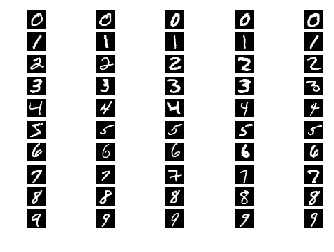

In [2]:
# Fetch and draw the digits
digits_data = fetch_mldata( 'MNIST original',data_home='data')
digits = fetch_mldata( 'MNIST original',data_home='data').data
targets = fetch_mldata( 'MNIST original',data_home='data').target

counter = 1
for i in range(0,10):
    digits2plot = digits[np.where(targets==i)][:5]
    for j in range(0,5):
        plt.subplot(10, 5, counter)
        plt.imshow(digits2plot[j].reshape(28,28),
                  cmap = cm.Greys_r, interpolation = 'nearest')
        plt.axis('off')
        counter += 1


In [3]:
# We will work on a subset of the data
data = fetch_mldata( 'MNIST original',data_home='data')
np.random.seed(100)
sampleToTake = np.random.choice(70000, 2000, replace=False)
# data = data[random.sample(range(72000),2000)]
X, y = data.data[sampleToTake], data.target[sampleToTake]
print(X.shape, y.shape)
# X = X/255.0*2 - 1
X = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2000, 784) (2000,)
(1500, 784) (500, 784) (1500,) (500,)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [4]:
print(data.data.shape)
print(X_train.shape)

(70000, 784)
(1500, 784)


In [5]:
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
clf_perceptron = Perceptron(n_iter = 1000,  random_state = 100)
clf_MLPPerceptron = MLPClassifier(activation='logistic',
                                  hidden_layer_sizes=(200, 100, 50),verbose = True, random_state = 100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [6]:
nnmodel = clf_perceptron.fit(X_train,y_train)
mlpmodel = clf_MLPPerceptron.fit(X_train,y_train)

Iteration 1, loss = 2.31590651
Iteration 2, loss = 2.26797738
Iteration 3, loss = 2.23387510
Iteration 4, loss = 2.17978675
Iteration 5, loss = 2.10559349
Iteration 6, loss = 2.01213248
Iteration 7, loss = 1.90454753
Iteration 8, loss = 1.79327472
Iteration 9, loss = 1.68276346
Iteration 10, loss = 1.57488202
Iteration 11, loss = 1.47253994
Iteration 12, loss = 1.37487924
Iteration 13, loss = 1.28329866
Iteration 14, loss = 1.19790261
Iteration 15, loss = 1.11832840
Iteration 16, loss = 1.04507979
Iteration 17, loss = 0.97652096
Iteration 18, loss = 0.91325251
Iteration 19, loss = 0.85414194
Iteration 20, loss = 0.79898608
Iteration 21, loss = 0.74825318
Iteration 22, loss = 0.69868413
Iteration 23, loss = 0.65407125
Iteration 24, loss = 0.61214882
Iteration 25, loss = 0.57299966
Iteration 26, loss = 0.53524252
Iteration 27, loss = 0.49832132
Iteration 28, loss = 0.46619521
Iteration 29, loss = 0.43410591
Iteration 30, loss = 0.40524431
Iteration 31, loss = 0.37774848
Iteration 32, los

In [18]:
nnpredictions = nnmodel.predict(X_test)
mlppredictions = mlpmodel.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print( classification_report(y_test,nnpredictions))
print('perceptron accuracy score ', accuracy_score(nnpredictions,y_test))
print(confusion_matrix(y_test,nnpredictions))

             precision    recall  f1-score   support

        0.0       0.94      0.97      0.95        61
        1.0       0.88      0.95      0.91        61
        2.0       0.85      0.83      0.84        42
        3.0       0.67      0.69      0.68        32
        4.0       0.91      0.84      0.88        63
        5.0       0.75      0.71      0.73        42
        6.0       0.94      0.94      0.94        53
        7.0       0.80      0.80      0.80        45
        8.0       0.79      0.68      0.73        50
        9.0       0.71      0.80      0.75        51

avg / total       0.84      0.84      0.84       500

perceptron accuracy score  0.836
[[59  0  0  0  0  0  1  0  0  1]
 [ 0 58  1  0  0  0  0  0  0  2]
 [ 0  0 35  2  0  0  0  4  0  1]
 [ 1  1  1 22  1  3  0  0  3  0]
 [ 0  0  0  2 53  0  0  1  3  4]
 [ 0  2  0  4  1 30  1  0  2  2]
 [ 0  1  1  0  0  0 50  0  1  0]
 [ 1  0  2  0  0  2  0 36  0  4]
 [ 1  4  1  1  0  4  0  2 34  3]
 [ 1  0  0  2  3  1  1  2  0 41

In [20]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print( classification_report(y_test,mlppredictions) )
print('mlp accuracy score ' , accuracy_score(y_test,mlppredictions))
print('\n',confusion_matrix(y_test,mlppredictions))

             precision    recall  f1-score   support

        0.0       0.95      0.97      0.96        61
        1.0       0.95      0.98      0.97        61
        2.0       0.86      0.86      0.86        42
        3.0       0.70      0.72      0.71        32
        4.0       0.87      0.83      0.85        63
        5.0       0.84      0.88      0.86        42
        6.0       0.94      0.94      0.94        53
        7.0       0.82      0.80      0.81        45
        8.0       0.91      0.80      0.85        50
        9.0       0.76      0.82      0.79        51

avg / total       0.87      0.87      0.87       500

mlp accuracy score  0.87

 [[59  0  0  1  0  0  1  0  0  0]
 [ 0 60  0  0  0  0  0  1  0  0]
 [ 0  0 36  2  1  0  1  2  0  0]
 [ 1  0  2 23  0  1  0  2  3  0]
 [ 1  0  0  0 52  0  0  1  0  9]
 [ 0  1  2  1  0 37  0  0  1  0]
 [ 1  0  1  0  1  0 50  0  0  0]
 [ 0  1  1  1  2  1  0 36  0  3]
 [ 0  1  0  2  0  5  1  0 40  1]
 [ 0  0  0  3  4  0  0  2  0 42]]


In [21]:
from sklearn.preprocessing import label_binarize
ytest_lb = label_binarize(y_test,classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
pred_probs = mlpmodel.predict_proba(X_test)

In [22]:
pred_probs.shape

(500, 10)

In [23]:
ytest_lb[:5]

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

In [24]:
x = 453
print(pred_probs[x],'\nMax Prbability ',np.max(pred_probs[x]), '\nPredicted Class ',np.argmax(
pred_probs[x]))
print(mlppredictions[x])

[  1.09828141e-04   6.37830919e-04   2.18589256e-06   3.80726782e-05
   4.57073924e-03   1.45740383e-04   2.29682296e-04   3.89162731e-03
   2.39684899e-04   9.90134608e-01] 
Max Prbability  0.990134608244 
Predicted Class  9
9.0


Text(0,0.5,'True Positive Rate')

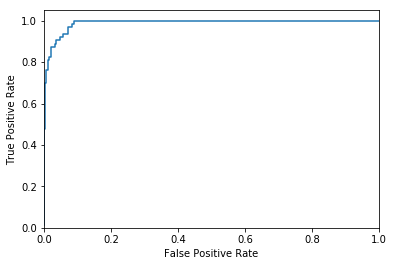

In [25]:
from sklearn.metrics import roc_curve, auc
# some rough work to draw the multi class rocs
d2t = 4
# roc_curve?
f, t, tr = roc_curve(ytest_lb[:,d2t], pred_probs[:,d2t])
# y_test
plt.plot(f ,t)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [30]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
tholds = dict()
roc_auc = dict()
for i in arange(10):
    fpr[i], tpr[i], tholds[i] = roc_curve( ytest_lb[:,i], pred_probs[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

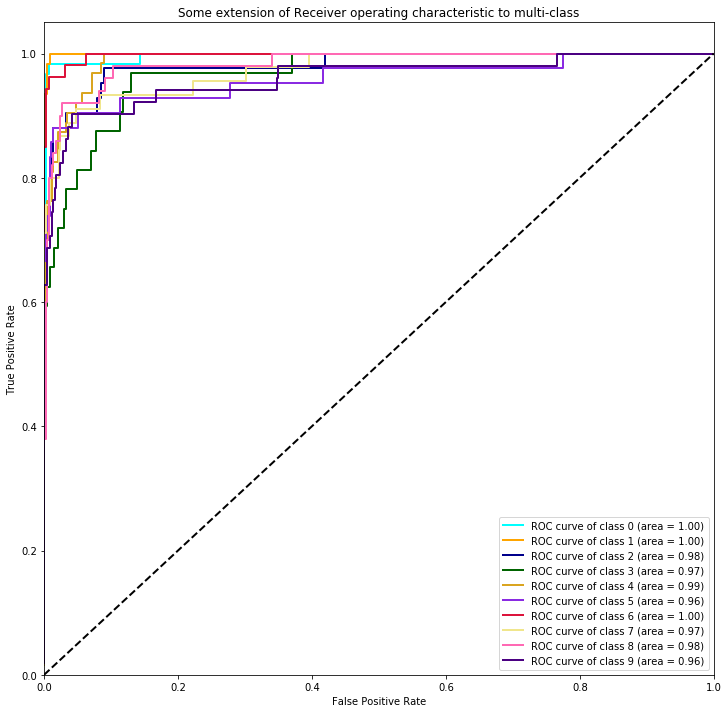

In [31]:
clrs = ['aqua','orange','darkblue','darkgreen','goldenrod','blueviolet','crimson','khaki','hotpink','indigo']


fig = figure()
for i, clr in zip( range(10), clrs):
    plt.plot(fpr[i],tpr[i],color=clr,lw=2,
             label='ROC curve of class {0} (area = {1:.2f})'.format(i,roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
fig.set_size_inches(12, 12)

In [32]:
np.set_printoptions(precision=3)
print('tpr    fpr   tholds')
print('\n'.join(['{0:1.2f}  {1:1.3f}  {2:1.3f}'.format(x[0], x[1], x[2]) 
                 for x in zip(tpr[3], fpr[3], tholds[3])]))

tpr    fpr   tholds
0.03  0.000  0.995
0.53  0.000  0.991
0.53  0.002  0.991
0.59  0.002  0.989
0.59  0.004  0.986
0.62  0.004  0.986
0.62  0.009  0.979
0.66  0.009  0.976
0.66  0.015  0.963
0.69  0.015  0.771
0.69  0.021  0.590
0.72  0.021  0.487
0.72  0.030  0.309
0.75  0.030  0.290
0.75  0.032  0.244
0.78  0.032  0.240
0.78  0.049  0.142
0.81  0.049  0.119
0.81  0.071  0.048
0.84  0.071  0.047
0.84  0.077  0.026
0.88  0.077  0.026
0.88  0.113  0.009
0.91  0.113  0.007
0.91  0.118  0.007
0.94  0.118  0.007
0.94  0.130  0.005
0.97  0.130  0.004
0.97  0.370  0.001
1.00  0.370  0.001
1.00  1.000  0.000


# Deep learning - convolutional neural networks - ConvNets

### There are three key intuitions behind ConvNets:
#### * Local receptive fields
#### * Shared Weights
#### * Pooling
### A convolutinal layer, referred to also as a filter, is a particular kind of neural network that manipulates the image to highlight certain features
### We represent an image as a matrix of pixels 
### We can encode information from a submatrix of pixels into one single hidden neuron belonging to the next layer
### That single neuron represents one local receptive field
### This operation is called convolution and gives the name to this type of network
### We can encode more information by adding on more submatrices 
### Example - lets suppose that the size of each submatrix is 3 x 3 - then we can slide it over the Minst data matrix of 28 x 28 fields to generate 26 x 26 local receptive fields
### In keras, the size of each single submatrix is called the stride length
### We may take a 2 stride instead of 1 and we may apply the filter partially beyond the matrix - these will be the paddings and will take on a default value of 0
### The sliding from one layer to the other gives us featuremaps. We start with 28 x 28 input neurons for processing MNIST and we get a featuremap of size 26 x 26. We could have k feature maps
### For a filter, as we slide it across the image, we maintain the same weights. Thus when we apply two feature maps from an input of 28 x 28 x 1 we get an output of 26 x 26 x 2 and overall parameters used will be 3 x 3 x 2 - 18, way less than the 784 x lets say 50 - 39000 roughly, employed in feed forward networks
### In Keras, if we want to add a convolutional layer with dimensionality of the output 32 and extension of each filter 3 x 3, we will write:
### model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3))
### This means that we are applying a 3 x 3 convolution on a 256 x 256 image with three input channels (or input filters), resulting in 32 output channels (or output filters).

<img src='neural_net_vs_convnet.jpg'/>

In [33]:
X_train = X_train.astype('float32')     
X_test = X_test.astype('float32')     

In [34]:
# we are going to pick a part of the image and apply the filter step by step to that area
def convolution(image,im_filter):
    im = X_train[image].reshape(28,28)
    print(im.shape)
    width = im.shape[0]       
    height = im.shape[1]
    imC = numpy.zeros((width-2, height-2))
    for row in range(1, width-1):
        for col in range(1, height-1):
            for i in range(len(im_filter[0])):
                for j in range(len(im_filter)):
                    # What we are doing here is applying the filter to each of the 28 rows and columns of the
                    # modified image we will produce by applying it on 3 by 3 windows
                    # we go like row 1, col 1, i - 3, j -3 , row -1 - 0, col - 1 0
                    imC[row-1][col-1] += im[row-1+i][col-1+j]*im_filter[i][j]
                    # so the first one 
                    # imC[0][0] += im[0][0] * im_filter[0][0]
                    # imC[0][0] += im[0][1] * im_filter[0][1]
                    # imC[0][0] += im[0][2] * im_filter[0][2]
                    
                    # imC[0][0] += im[1][0] * im_filter[1][0]
                    # imC[0][0] += im[1][1] * im_filter[1][1]
                    # imC[0][0] += im[1][2] * im_filter[1][2]
                    
                    # imC[0][0] += im[2][0] * im_filter[2][0]
                    # imC[0][0] += im[2][1] * im_filter[2][1]
                    # imC[0][0] += im[2][2] * im_filter[2][2]
                    if imC[row-1][col-1] > 255:
                        imC[row-1][col-1] = 255
                    elif imC[row-1][col-1] < 0:
                        imC[row-1][col-1] = 0 
    plt.imshow(im, cmap=cm.Greys_r)
    plt.show()
    plt.imshow(imC/255, cmap=cm.Greys_r)

(28, 28)


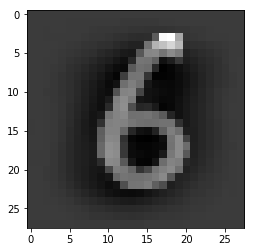

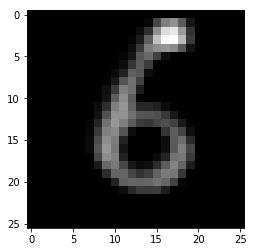

In [35]:
# we create a blur effect by multiplying each element of the fitler with an entry of the original image
# and sum it up. To get an average we are using 1/9
blur = [[1./9, 1./9, 1./9], [1./9, 1./9, 1./9], [1./9, 1./9, 1./9]]

convolution(3,blur)

(28, 28)


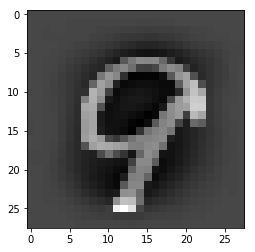

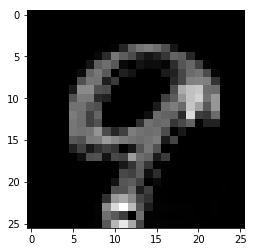

In [36]:
# An edges filter which adds the neighboring values and subtracts the center value
edges = [[1, 1, 1], [1, -3, 1], [1, 1, 1]]
convolution(1200,edges)

### After a convolutional operation, another operation is often performed—pooling. 
### The most classical example is called max-pooling, and this means creating (2 x 2) grids on each slice, and picking the neuron with the maximum activation value in each grid, discarding the rest. 
### Such an operation discards 75% of the neurons, keeping only the neurons that contribute the most in each cell
### There are two parameters for each pooling layer, similar to the stride and padding parameters found in convolutional layers, and they are the size of the cell and the stride. 
### One typical choice is to choose a cell size of 2 and a stride of 2, though it is not uncommon to pick a cell size of 3 and a stride of 2, creating some overlap 
### If the cell size is too large, the pooling layer may be discarding too much information and is not helpful
### Different pooling operations can be used. 
### Taking the max is one of the most common operations, but it is not uncommon to take the average of all the values, or even an L 2 measure, which is the square root of the sum of all the squares.
### In practice, max-pooling often performs better, since it retains the most relevant structures in the image
### Pooling layers are generally used in the middle of a sequence of a few convolutional layers, generally after every other convolutional operation
### In each dimension (either width or height), let the size of the input slice be called $I=(I_w , I_h )$, the size of the filter $F=(F_w ,F_h )$, the size of the stride $S=(S_w ,S_h )$, and the size of the padding $P=(P_w ,P_h )$, then the size $O=(O_w ,O_h )$ for the output slice is given by:

$O_w = \frac {I_w + 2 P_w - F_w }{S_w}$<br>
$O_h = \frac {I_h + 2 P_h - F_h }{S_h}$<br>

### The number of parameters W used, instead, is independent of the stride and padding, and it is just a function of the (square) size of the filter, the depth D (number of slices) of the input, and the number of feature maps M chosen:
$W = (D * F_wF_h + 1 ) * M $

### We can think of filters ro be small neural networks. A set of weights that will yield a final value that represents the activation of a neuron in the next layer
### While we have plugged in  weights ourselves for demoing, they will be learn automatically by the neural network through back propagation

In [37]:
import numpy as np      
np.random.seed(0)  #for reproducibility
from keras.datasets import mnist 
from keras.models import Sequential  
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Flatten, Dropout  
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

input_size = 784
batch_size = 100     
hidden_neurons = 200     
classes = 10     
epochs = 20       
        
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)     
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)          
X_train = X_train.astype('float32')     
X_test = X_test.astype('float32')     
# X_train /= 255     
# X_test /= 255               
Y_train_ohe = np_utils.to_categorical(y_train, classes)     
Y_test_ohe = np_utils.to_categorical(y_test, classes)              



Using TensorFlow backend.


In [38]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape,Y_train_ohe.shape,Y_test_ohe.shape)

(1500, 28, 28, 1) (500, 28, 28, 1) (1500,) (500,) (1500, 10) (500, 10)


In [39]:
Convolution2D?

In [57]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(28, 28, 1)))             
model.add(Activation('relu'))                     
model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))                  
model.add(MaxPooling2D(pool_size=(2, 2)))             
model.add(Dropout(0.25))                  
model.add(Flatten())         
model.add(Dense(600))
model.add(Activation('relu'))       
model.add(Dense(classes))       
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_39 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_40 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 4608)              0         
__________

In [58]:
model.compile(loss='categorical_crossentropy',             
              metrics=['accuracy'], optimizer='adadelta')    
cost_history = model.fit(X_train, Y_train_ohe, batch_size=batch_size,        
        epochs=epochs, validation_split = 0.1, verbose=1) 
score = model.evaluate(X_train, Y_train_ohe, verbose=1)
print('Train accuracy:', score[1])                   
score = model.evaluate(X_test, Y_test_ohe, verbose=1) 
print('Test accuracy:', score[1])

Train on 1350 samples, validate on 150 samples
Epoch 1/20
1350/1350 [==============================] - 6s 4ms/step - loss: 1.2504 - acc: 0.5941 - val_loss: 0.8717 - val_acc: 0.7533
Epoch 2/20
1350/1350 [==============================] - 6s 4ms/step - loss: 0.4240 - acc: 0.8600 - val_loss: 0.6059 - val_acc: 0.8200
Epoch 3/20
1350/1350 [==============================] - 5s 4ms/step - loss: 0.2235 - acc: 0.9348 - val_loss: 0.3596 - val_acc: 0.9000
Epoch 4/20
1350/1350 [==============================] - 5s 4ms/step - loss: 0.1324 - acc: 0.9570 - val_loss: 0.3610 - val_acc: 0.9000
Epoch 5/20
1350/1350 [==============================] - 5s 4ms/step - loss: 0.0959 - acc: 0.9726 - val_loss: 0.2328 - val_acc: 0.9267
Epoch 6/20
1350/1350 [==============================] - 5s 4ms/step - loss: 0.0436 - acc: 0.9874 - val_loss: 0.3044 - val_acc: 0.9067
Epoch 7/20
1350/1350 [==============================] - 5s 4ms/step - loss: 0.0294 - acc: 0.9941 - val_loss: 0.2971 - val_acc: 0.9067
Epoch 8/20
1350

In [59]:
convnet_predictions = model.predict(X_test)

In [60]:
print(accuracy_score(y_test,convnet_predictions.argmax(axis=1)))
print(confusion_matrix(y_test,convnet_predictions.argmax(axis=1)))
print(classification_report(y_test,convnet_predictions.argmax(axis=1)))

0.954
[[59  0  0  2  0  0  0  0  0  0]
 [ 0 60  0  0  0  0  0  1  0  0]
 [ 0  0 38  0  0  0  0  3  1  0]
 [ 0  0  0 31  0  0  0  0  1  0]
 [ 0  0  0  0 63  0  0  0  0  0]
 [ 0  1  0  3  0 36  0  0  2  0]
 [ 1  0  0  0  0  0 51  0  1  0]
 [ 0  0  1  1  0  0  0 43  0  0]
 [ 0  0  0  1  0  1  0  0 47  1]
 [ 0  0  0  0  2  0  0  0  0 49]]
             precision    recall  f1-score   support

        0.0       0.98      0.97      0.98        61
        1.0       0.98      0.98      0.98        61
        2.0       0.97      0.90      0.94        42
        3.0       0.82      0.97      0.89        32
        4.0       0.97      1.00      0.98        63
        5.0       0.97      0.86      0.91        42
        6.0       1.00      0.96      0.98        53
        7.0       0.91      0.96      0.93        45
        8.0       0.90      0.94      0.92        50
        9.0       0.98      0.96      0.97        51

avg / total       0.96      0.95      0.95       500



dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


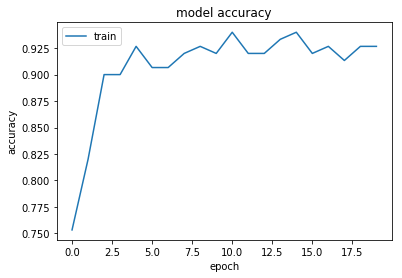

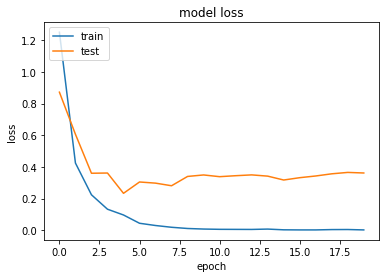

In [61]:
# list all data in history
history = cost_history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:
?Convolution2D